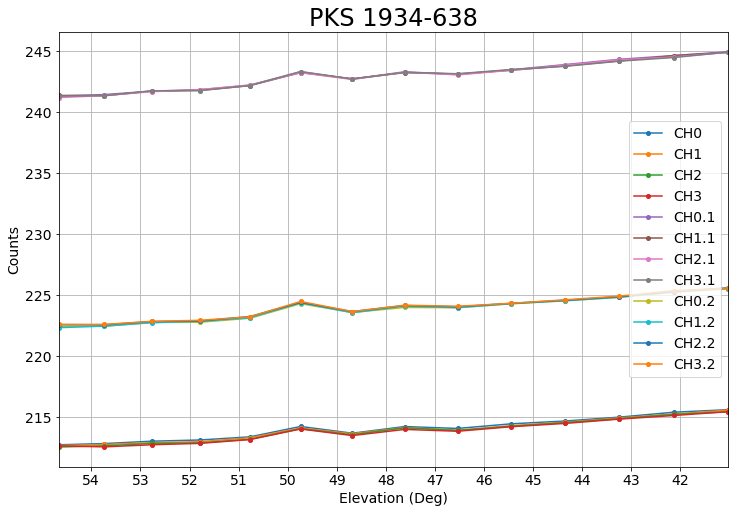

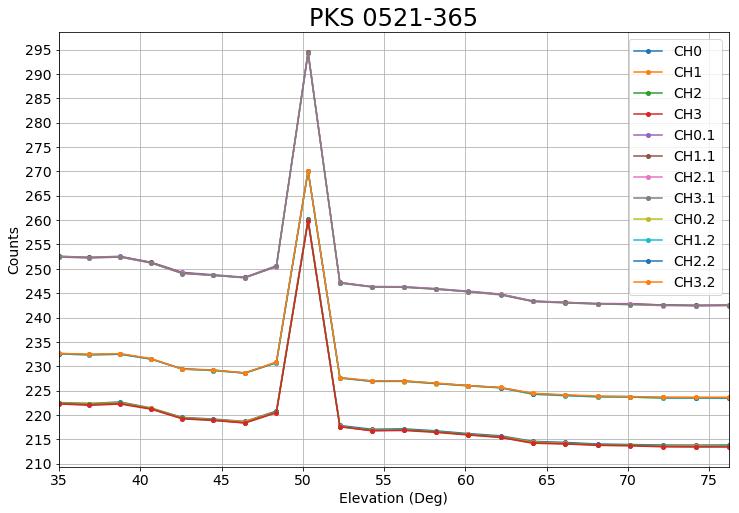

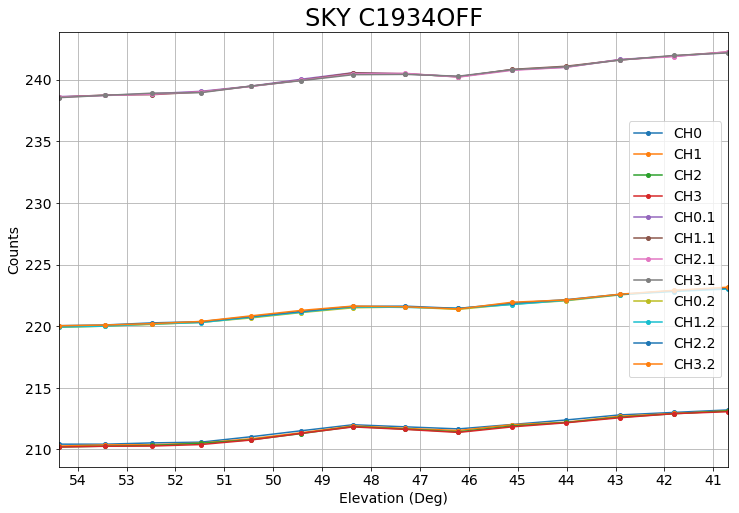

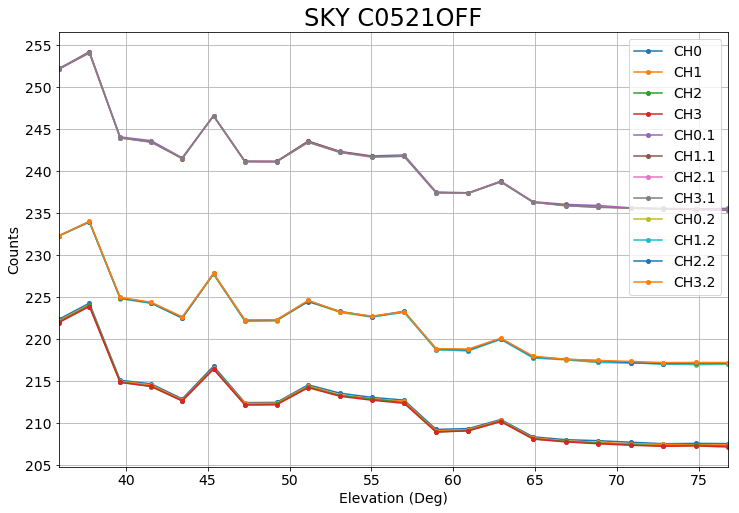

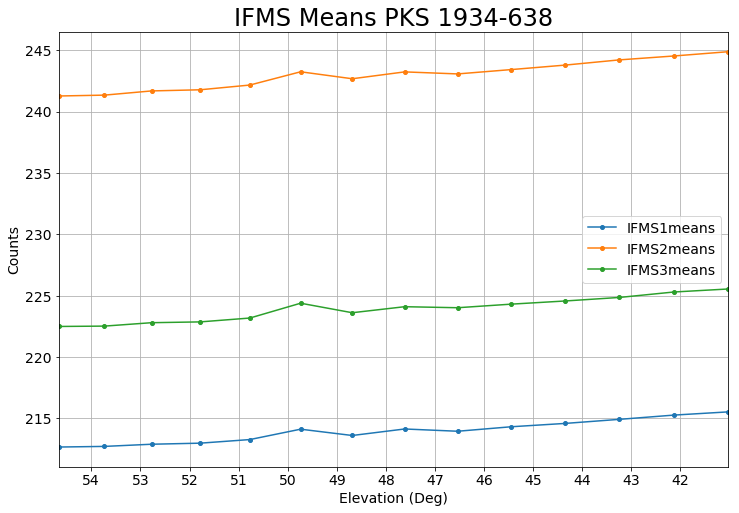

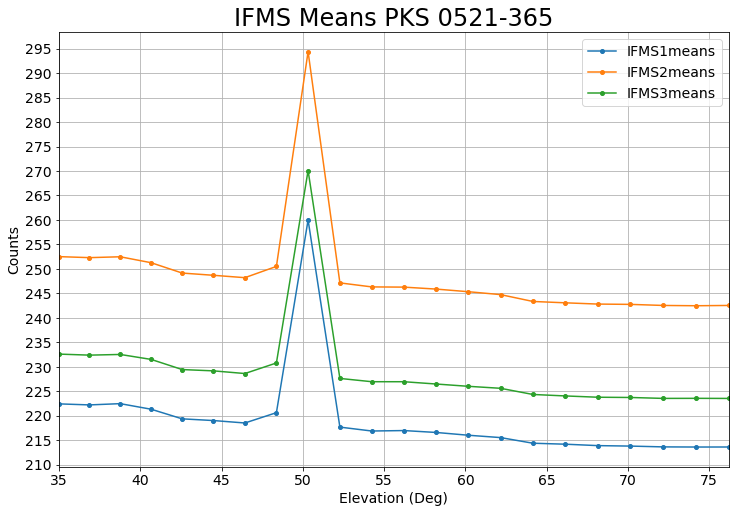

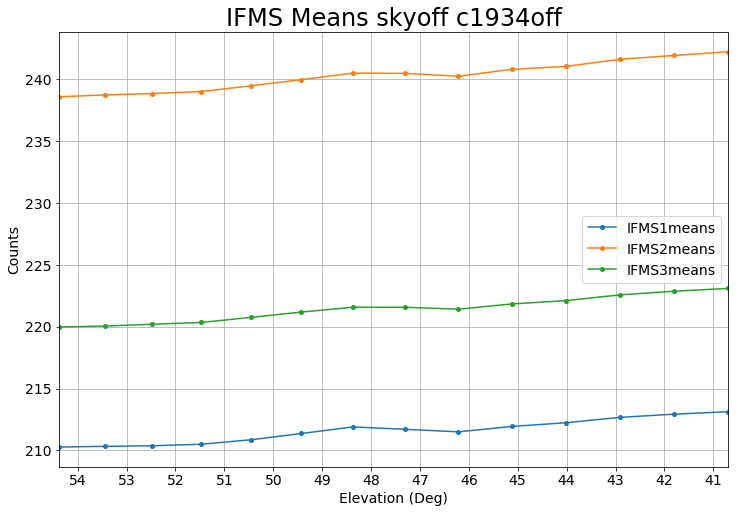

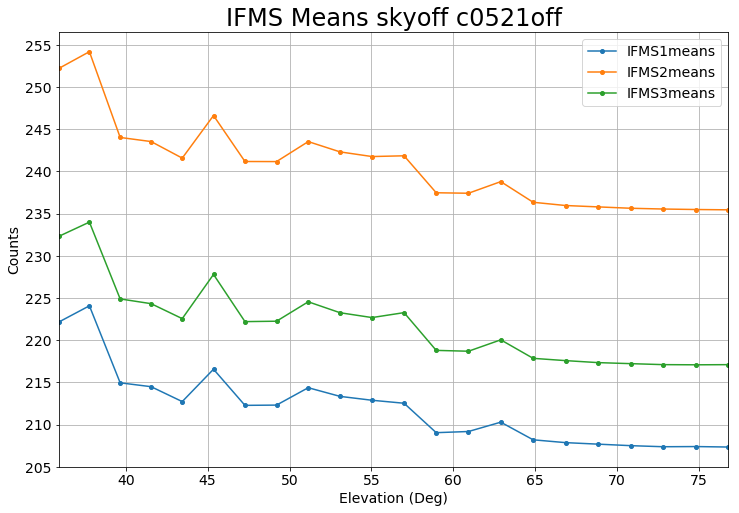

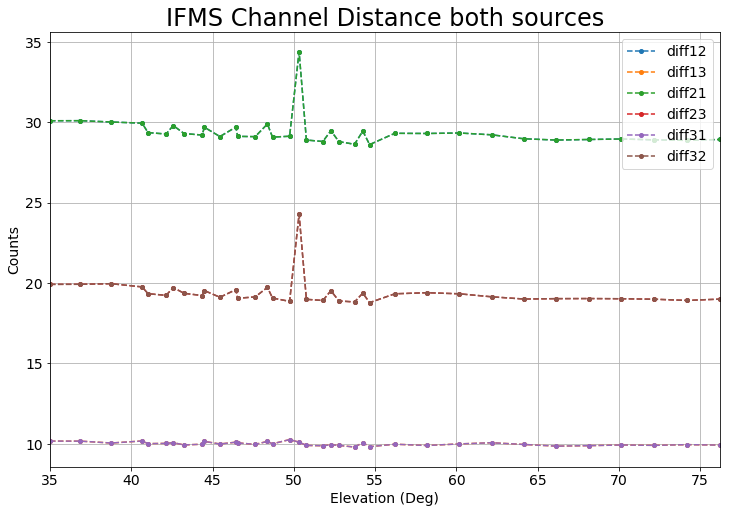

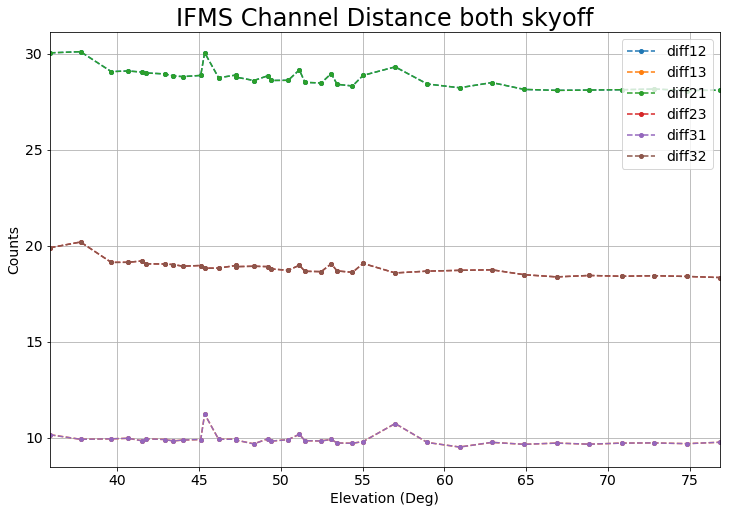

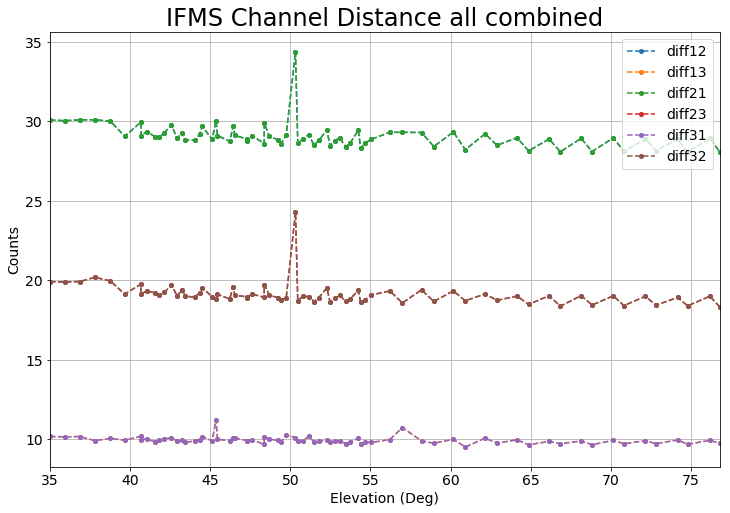

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FormatStrFormatter, MultipleLocator
from scipy.optimize import curve_fit

import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('legend', fontsize=14)

from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

tick_spacing1 = 5
tick_spacing2 = 5
thrs1=0
thrs2=0

filename='/home/bgx/.mega2/Desarrollo/github/radsa/tests/CUDA/result_cuda1.xls'

ON = pd.read_excel(filename, sheetname='Source',  index = False)
ON=ON.reset_index(drop=True)
ON[['CH0','CH1','CH2','CH3']]=ON[['CH0','CH1','CH2','CH3']]+thrs1
ON[['CH0.2','CH1.2','CH2.2','CH3.2']]=ON[['CH0.2','CH1.2','CH2.2','CH3.2']]+thrs2

OFF = pd.read_excel(filename, sheetname='SkyOFF',  index = False)
OFF = OFF.reset_index(drop=True)
OFF[['CH0','CH1','CH2','CH3']]=OFF[['CH0','CH1','CH2','CH3']]+thrs1
OFF[['CH0.2','CH1.2','CH2.2','CH3.2']]=OFF[['CH0.2','CH1.2','CH2.2','CH3.2']]+thrs2

SOURCE1 = ON[ON['IFMS1'] == '1934-638']
del SOURCE1['IFMS1']
del SOURCE1['IFMS2']
del SOURCE1['IFMS3']
ax = SOURCE1.set_index('Elev (Deg)').plot(figsize=(12,8), marker='o', markersize=4, linestyle='-', grid=True, fontsize=14,title='PKS 1934-638')
ax.set_xlabel("Elevation (Deg)",size = 14)
ax.set_ylabel("Counts", size = 14)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(tick_spacing2))
# plt.minorticks_on() 

SOURCE2 = ON[ON['IFMS1'] == '0521-365']
del SOURCE2['IFMS1']
del SOURCE2['IFMS2']
del SOURCE2['IFMS3']
ax = SOURCE2.set_index('Elev (Deg)').plot(figsize=(12,8), marker='o', markersize=4, 
                                          linestyle='-', grid=True, fontsize=14,title='PKS 0521-365')
ax.set_xlabel("Elevation (Deg)",size = 14)
ax.set_ylabel("Counts", size = 14)
ax.xaxis.set_major_locator(MultipleLocator(tick_spacing1))
ax.yaxis.set_major_locator(MultipleLocator(tick_spacing2))

SKY1 = OFF[OFF['IFMS1'] == '1934-638']
del SKY1['IFMS1']
del SKY1['IFMS2']
del SKY1['IFMS3']
ax = SKY1.set_index('Elev (Deg)').plot(figsize=(12,8), marker='o', markersize=4, 
                                       linestyle='-', grid=True, fontsize=14,title='SKY C1934OFF')
ax.set_xlabel("Elevation (Deg)",size = 14)
ax.set_ylabel("Counts", size = 14)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(tick_spacing2))

SKY2 = OFF[OFF['IFMS1'] == '0521-365']
del SKY2['IFMS1']
del SKY2['IFMS2']
del SKY2['IFMS3']
ax = SKY2.set_index('Elev (Deg)').plot(figsize=(12,8), marker='o', markersize=4, 
                                       linestyle='-', grid=True, fontsize=14,title='SKY C0521OFF')
ax.set_xlabel("Elevation (Deg)",size = 14)
ax.set_ylabel("Counts", size = 14)
ax.xaxis.set_major_locator(MultipleLocator(tick_spacing1))
ax.yaxis.set_major_locator(MultipleLocator(tick_spacing2))

df1 = SOURCE1[['Elev (Deg)']]
df1['IFMS1means'] = SOURCE1[['CH0','CH1','CH2','CH3']].mean(axis=1)
df1['IFMS2means'] = SOURCE1[['CH0.1','CH1.1','CH2.1','CH3.1']].mean(axis=1)
df1['IFMS3means'] = SOURCE1[['CH0.2','CH1.2','CH2.2','CH3.2']].mean(axis=1)
ax=df1.set_index('Elev (Deg)').plot(figsize=(12,8), marker='o', markersize=4, 
                                    linestyle='-', grid=True, fontsize=14,title='IFMS Means PKS 1934-638')
ax.set_xlabel("Elevation (Deg)",size = 14)
ax.set_ylabel("Counts", size = 14)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(tick_spacing2))

df1['diff12']=df1['IFMS1means']-df1['IFMS2means']
df1['diff12']=df1['diff12'].abs()
df1['diff13']=df1['IFMS1means']-df1['IFMS3means']
df1['diff13']=df1['diff13'].abs()
df1['diff21']=df1['IFMS2means']-df1['IFMS1means']
df1['diff21']=df1['diff21'].abs()
df1['diff23']=df1['IFMS2means']-df1['IFMS3means']
df1['diff23']=df1['diff23'].abs()
df1['diff31']=df1['IFMS3means']-df1['IFMS1means']
df1['diff31']=df1['diff31'].abs()
df1['diff32']=df1['IFMS3means']-df1['IFMS2means']
df1['diff32']=df1['diff32'].abs()


df2=SOURCE2[['Elev (Deg)']]
df2['IFMS1means']=SOURCE2[['CH0','CH1','CH2','CH3']].mean(axis=1)
df2['IFMS2means']=SOURCE2[['CH0.1','CH1.1','CH2.1','CH3.1']].mean(axis=1)
df2['IFMS3means']=SOURCE2[['CH0.2','CH1.2','CH2.2','CH3.2']].mean(axis=1)
ax=df2.set_index('Elev (Deg)').plot(figsize=(12,8), marker='o', markersize=4, 
                                    linestyle='-', grid=True, fontsize=14,title='IFMS Means PKS 0521-365')
ax.set_xlabel("Elevation (Deg)",size = 14)
ax.set_ylabel("Counts", size = 14)
ax.xaxis.set_major_locator(MultipleLocator(tick_spacing1))
ax.yaxis.set_major_locator(MultipleLocator(tick_spacing2))

df2['diff12']=df2['IFMS1means']-df2['IFMS2means']
df2['diff12']=df2['diff12'].abs()
df2['diff13']=df2['IFMS1means']-df2['IFMS3means']
df2['diff13']=df2['diff13'].abs()
df2['diff21']=df2['IFMS2means']-df2['IFMS1means']
df2['diff21']=df2['diff21'].abs()
df2['diff23']=df2['IFMS2means']-df2['IFMS3means']
df2['diff23']=df2['diff23'].abs()
df2['diff31']=df2['IFMS3means']-df2['IFMS1means']
df2['diff31']=df2['diff31'].abs()
df2['diff32']=df2['IFMS3means']-df2['IFMS2means']
df2['diff32']=df2['diff32'].abs()

df3=SKY1[['Elev (Deg)']]
df3['IFMS1means']=SKY1[['CH0','CH1','CH2','CH3']].mean(axis=1)
df3['IFMS2means']=SKY1[['CH0.1','CH1.1','CH2.1','CH3.1']].mean(axis=1)
df3['IFMS3means']=SKY1[['CH0.2','CH1.2','CH2.2','CH3.2']].mean(axis=1)
ax=df3.set_index('Elev (Deg)').plot(figsize=(12,8), marker='o', markersize=4, 
                                    linestyle='-', grid=True, fontsize=14,title='IFMS Means skyoff c1934off')
ax.set_xlabel("Elevation (Deg)",size = 14)
ax.set_ylabel("Counts", size = 14)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(tick_spacing2))

df3['diff12']=df3['IFMS1means']-df3['IFMS2means']
df3['diff12']=df3['diff12'].abs()
df3['diff13']=df3['IFMS1means']-df3['IFMS3means']
df3['diff13']=df3['diff13'].abs()
df3['diff21']=df3['IFMS2means']-df3['IFMS1means']
df3['diff21']=df3['diff21'].abs()
df3['diff23']=df3['IFMS2means']-df3['IFMS3means']
df3['diff23']=df3['diff23'].abs()
df3['diff31']=df3['IFMS3means']-df3['IFMS1means']
df3['diff31']=df3['diff31'].abs()
df3['diff32']=df3['IFMS3means']-df3['IFMS2means']
df3['diff32']=df3['diff32'].abs()

df4=SKY2[['Elev (Deg)']]
df4['IFMS1means']=SKY2[['CH0','CH1','CH2','CH3']].mean(axis=1)
df4['IFMS2means']=SKY2[['CH0.1','CH1.1','CH2.1','CH3.1']].mean(axis=1)
df4['IFMS3means']=SKY2[['CH0.2','CH1.2','CH2.2','CH3.2']].mean(axis=1)
ax=df4.set_index('Elev (Deg)').plot(figsize=(12,8), marker='o', markersize=4, 
                                    linestyle='-', grid=True, fontsize=14,title='IFMS Means skyoff c0521off')
ax.set_xlabel("Elevation (Deg)",size = 14)
ax.set_ylabel("Counts", size = 14)
ax.xaxis.set_major_locator(MultipleLocator(tick_spacing1))
ax.yaxis.set_major_locator(MultipleLocator(tick_spacing2))

df4['diff12']=df4['IFMS1means']-df4['IFMS2means']
df4['diff12']=df4['diff12'].abs()
df4['diff13']=df4['IFMS1means']-df4['IFMS3means']
df4['diff13']=df4['diff13'].abs()
df4['diff21']=df4['IFMS2means']-df4['IFMS1means']
df4['diff21']=df4['diff21'].abs()
df4['diff23']=df4['IFMS2means']-df4['IFMS3means']
df4['diff23']=df4['diff23'].abs()
df4['diff31']=df4['IFMS3means']-df4['IFMS1means']
df4['diff31']=df4['diff31'].abs()
df4['diff32']=df4['IFMS3means']-df4['IFMS2means']
df4['diff32']=df4['diff32'].abs()


df5=pd.merge(df1,df2, how='outer')
df5.set_index('Elev (Deg)',inplace=True)
df5.sort_index(inplace=True)
del df5['IFMS1means']
del df5['IFMS2means']
del df5['IFMS3means']
ax = df5.plot(figsize=(12,8), fontsize=14, marker='o', markersize=4, linestyle='--', 
              grid=True, title='IFMS Channel Distance both sources')
ax.set_xlabel("Elevation (Deg)",size = 14)
ax.set_ylabel("Counts", size = 14)
ax.xaxis.set_major_locator(MultipleLocator(tick_spacing1))
ax.yaxis.set_major_locator(MultipleLocator(tick_spacing2))

df6=pd.merge(df3,df4, how='outer')
df6.set_index('Elev (Deg)',inplace=True)
df6.sort_index(inplace=True)
del df6['IFMS1means']
del df6['IFMS2means']
del df6['IFMS3means']
ax = df6.plot(figsize=(12,8), fontsize=14, marker='o', markersize=4, linestyle='--', 
              grid=True,title='IFMS Channel Distance both skyoff')
ax.set_xlabel("Elevation (Deg)",size = 14)
ax.set_ylabel("Counts", size = 14)
ax.xaxis.set_major_locator(MultipleLocator(tick_spacing1))
ax.yaxis.set_major_locator(MultipleLocator(tick_spacing2))

df7=pd.merge(df1,df2, how='outer')
df7=pd.merge(df7,df3, how='outer')
df7=pd.merge(df7,df4, how='outer')
df7.set_index('Elev (Deg)',inplace=True)
df7.sort_index(inplace=True)
del df7['IFMS1means']
del df7['IFMS2means']
del df7['IFMS3means']
ax = df7.plot(figsize=(12,8), marker='o', markersize=4, linestyle='--', grid=True, 
              fontsize=14,title='IFMS Channel Distance all combined')
ax.set_xlabel("Elevation (Deg)",size = 14)
ax.set_ylabel("Counts", size = 14)
ax.xaxis.set_major_locator(MultipleLocator(tick_spacing1))
ax.yaxis.set_major_locator(MultipleLocator(tick_spacing2))
